In [661]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [662]:
# !pip install chart_studio
# !pip install cufflinks

In [663]:
import plotly.express as px
import plotly.graph_objs as go
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

In [664]:
train_data = pd.read_excel(r"C:\Users\nazir\Desktop\ML Projects\Flight_Price_Prediction/Data_Train.xlsx")

In [665]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [666]:
train_data.info() # Checking for data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [667]:
train_data.isna().sum() #Checking for missing values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [668]:
train_data[train_data['Total_Stops'].isna()] # Retrieving rows with missing values

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [669]:
train_data.dropna(inplace=True) # Droping the only row with a missing value

In [670]:
train_data.isna().sum() 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [671]:
train_data.info(memory_usage='deep') # checking actual memory usage

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


In [672]:
data = train_data.copy() # Making a copy of our data

In [673]:
data1 = train_data.copy()

In [674]:
data.columns # checking columns of data 

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [675]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [676]:
def change_into_Datetime(col):  # Changing to date_time
    data[col] = pd.to_datetime(data[col])

In [677]:
import warnings #Ignoring warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [678]:
for feature in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_into_Datetime(feature)

In [679]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [680]:
data['Day_of_Journey'] = data['Date_of_Journey'].dt.day
data['Month_of_Journey'] = data['Date_of_Journey'].dt.month
data['Year_of_Journey'] = data['Date_of_Journey'].dt.year

In [681]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-09-21 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-09-21 05:50:00,2023-09-21 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [682]:
data['Dep_Time'].dt.minute

0        20
1        50
2        25
3         5
4        50
         ..
10678    55
10679    45
10680    20
10681    30
10682    55
Name: Dep_Time, Length: 10682, dtype: int64

In [683]:
def extract_hour_min(data, col):  # Function for extracting hours and minutes of departure and arrival
    data[col + '_hour'] = data[col].dt.hour
    data[col + '_minute'] = data[col].dt.minute

In [684]:
extract_hour_min(data, 'Dep_Time')

In [685]:
extract_hour_min(data, 'Arrival_Time')

In [686]:
data.drop(columns=['Arrival_Time', 'Dep_Time'], inplace=True) #droping Arrival and Dep time columns

In [687]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


In [688]:
# data1 = data.copy()

In [689]:
# data['Dep_Time_hour'] = np.where(data['Dep_Time_hour'] > 0, data['Dep_Time_hour'],24)

In [690]:
def flight_dep_time(x):
    if (x > 4) and (x <= 8):
        return "early morning"
    elif (x > 8) and (x <= 12):
        return "morning"
    elif (x > 12) and (x <= 16):
        return "noon"
    elif (x > 16) and (x <= 20):
        return "evening"
    elif (x > 20) and (x <= 24):
        return "night"
    else:
        return "late night"

In [691]:
flight_dep = data['Dep_Time_hour'].apply(flight_dep_time).value_counts()

In [692]:
# def to_datetime(x):
#     return pd.to_datetime(x)

In [693]:
# data1['Date_of_Journey'] = data1['Date_of_Journey'].apply(to_datetime)

In [694]:
# data1.head()

In [695]:
flight_dep = flight_dep.reset_index().rename(columns = {'index':'Period'})
flight_dep.head()

,Period,Dep_Time_hour
0,early morning,2880
1,evening,2357
2,morning,2209
3,noon,1731
4,night,1040


<Axes: xlabel='Period', ylabel='Dep_Time_hour'>

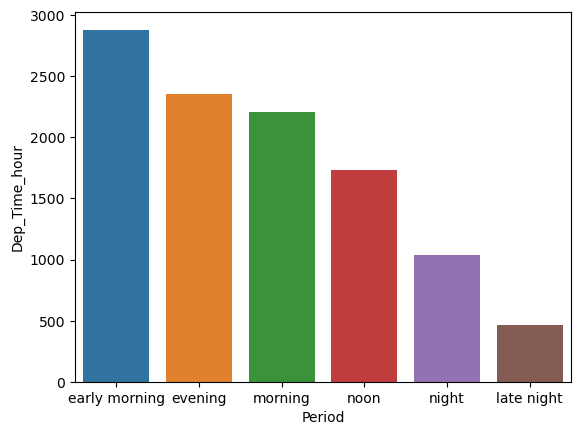

In [696]:
sns.barplot(data = flight_dep, x = flight_dep['Period'], y = flight_dep['Dep_Time_hour'])

In [697]:
px.bar(data_frame = flight_dep, x = flight_dep['Period'], y = flight_dep['Dep_Time_hour'])

In [698]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [699]:
'2h 50m'.split()[0][0:-1]

'2'

In [700]:
'2h 50m'.split()[1][0:-1]

'50'

In [701]:
def preprocess_duration(x): # A function to make Duration have the same parttern
    if 'h' not in x:
        x = '0h'+ ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'
    return x

In [702]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [703]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [704]:
def duration_hour_split(x):
    return int(x.split()[0][0:-1])

data['duration_hour'] = data['Duration'].apply(duration_hour_split)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hour
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4


In [705]:
def duration_minutes_split(x):
    return int(x.split()[1][0:-1])

data['duration_minute'] = data['Duration'].apply(duration_minutes_split)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hour,duration_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [706]:
data.dtypes

Airline                        object
Date_of_Journey        datetime64[ns]
Source                         object
Destination                    object
Route                          object
Duration                       object
Total_Stops                    object
Additional_Info                object
Price                           int64
Day_of_Journey                  int64
Month_of_Journey                int64
Year_of_Journey                 int64
Dep_Time_hour                   int64
Dep_Time_minute                 int64
Arrival_Time_hour               int64
Arrival_Time_minute             int64
duration_hour                   int64
duration_minute                 int64
dtype: object

In [707]:
# NB: We could have just used a lambda function for this problem
# data1['duration_hours'] = data1['Duration'].apply(lambda x: int(x.split()[0][0:-1]))
# data1.head()

#### Does duration impact price?

In [708]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hour,duration_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


<Axes: xlabel='duration_hour', ylabel='Price'>

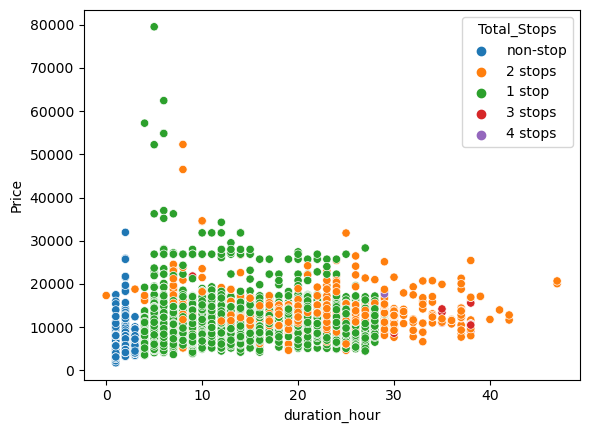

In [709]:
sns.scatterplot(data=data, x='duration_hour', y='Price', hue='Total_Stops')

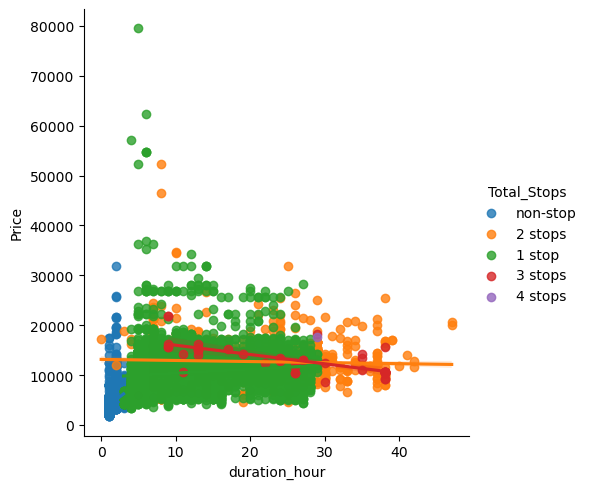

In [710]:
sns.lmplot(data=data, x='duration_hour', y='Price', hue='Total_Stops')

In [711]:
# Converting duration time to minutes. eval convert the strings into integers by performing simple arithmetics
data['total_duration_min'] = data['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

<Axes: xlabel='total_duration_min', ylabel='Price'>

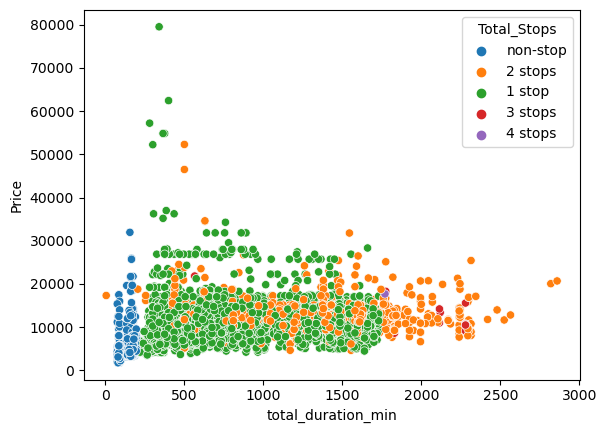

In [712]:
# There is no significant difference between this and that of using only duration hours.
sns.scatterplot(data=data, x='total_duration_min', y='Price', hue='Total_Stops')

### On which route is Jet Airways mostly used 
### Airline vrs Price analysis
      

In [713]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hour,duration_minute,total_duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45,285


In [714]:
data.groupby(['Airline', 'Route']).size().sort_values(ascending = False)['Jet Airways'].iplot(kind = 'bar')
# grouping by Airline and Route. then using the size method to count. then sorting values and slicing only rows jet airways and then ploting iplot

In [715]:
# doing it differently
Jet_Airways_df = data[data['Airline'] == 'Jet Airways'] # Selecting rows with jet airways
Jet_Airways_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hour,duration_minute,total_duration_min
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
6,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019,18,55,10,25,15,30,930


In [716]:
Jet_Airways_df.groupby('Route').size().sort_values(ascending=False).iplot(kind = 'bar')

In [717]:
# Using box plot for Airline and price analysis

px.box(data_frame=data.sort_values('Price', ascending = False ), x = 'Airline', y = 'Price')

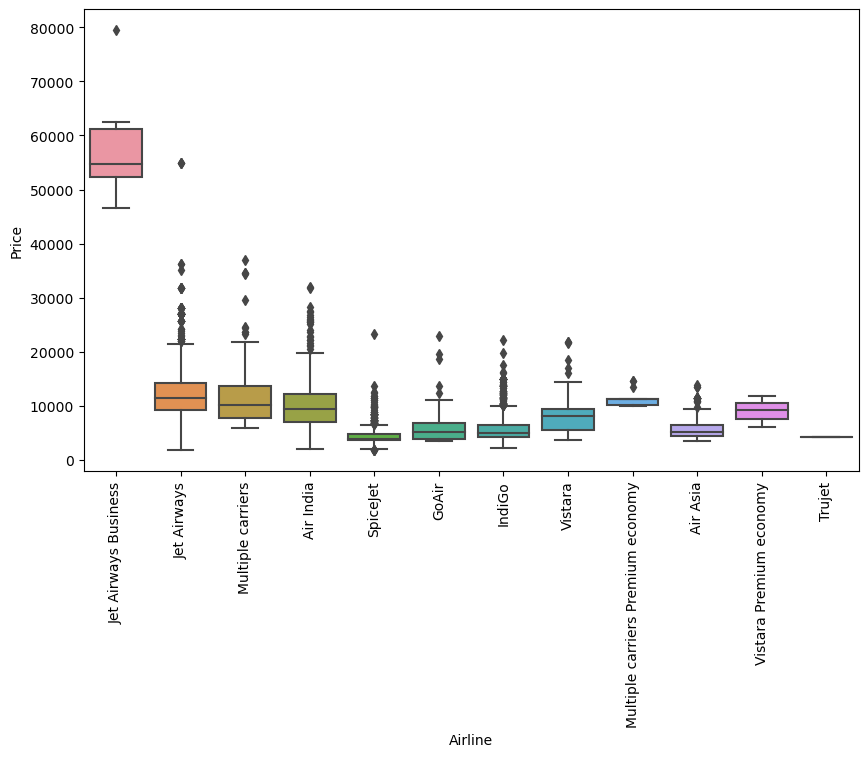

In [718]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data.sort_values('Price', ascending = False), x='Airline', y = 'Price')
plt.xticks(rotation = 'vertical')
plt.show()

#### Features/ Label encoding

In [719]:
cat_col = [col for col in data.columns if data[col].dtype == 'object']
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [720]:
num_col = [col for col in data.columns if data[col].dtype != 'object']
num_col

['Date_of_Journey',
 'Price',
 'Day_of_Journey',
 'Month_of_Journey',
 'Year_of_Journey',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'duration_hour',
 'duration_minute',
 'total_duration_min']

In [721]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [722]:
# Manually applying one-hot-encoding
for sub_cat in data['Source'].unique():
    data['Source_' + sub_cat] = data['Source'].apply(lambda x: 1 if x == sub_cat else 0)

In [723]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,...,Arrival_Time_hour,Arrival_Time_minute,duration_hour,duration_minute,total_duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,...,23,30,5,25,325,0,1,0,0,0
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,...,21,35,4,45,285,1,0,0,0,0


In [724]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [725]:
data['Destination'].replace('New Delhi', 'Delhi', inplace=True) # Converting New Delhi to Delhi

In [726]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

## We are going to use target encoding to encode 'Destination'. For continuous data, target encoding can be used to encode categorical features. We will group our data by the feature of interest. We will then slice the target variable and compute say the mean from each group, sort the values in ascending order and then retrieve the index (the ordered features). We will create dict comprehention to match each feature with its index. We will finally map the dictionary of ranked features and indexes to the feature in question in the dataframe to replace the feature's values with the keys of the dictionary

In [727]:
# grouping data by feature of interest, computing mean on target variable and retrieving sorted indexes
dest = data.groupby('Destination')['Price'].mean().sort_values().index
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [728]:
# dict comprehension for the retrieved ranked features
dict_dest = {value:key for key, value in enumerate(dest, 0)}
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [729]:
# mapping dictionary to feature and replacing mapped values with original values
data['Destination'] = data['Destination'].map(dict_dest)

In [730]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,...,Arrival_Time_hour,Arrival_Time_minute,duration_hour,duration_minute,total_duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0
3,IndiGo,2019-12-05,Kolkata,3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,...,23,30,5,25,325,0,1,0,0,0
4,IndiGo,2019-01-03,Banglore,2,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,...,21,35,4,45,285,1,0,0,0,0


In [731]:
data['Airline'] = data['Airline'].str.lower()

In [732]:
data['Airline'].unique()

array(['indigo', 'air india', 'jet airways', 'spicejet',
       'multiple carriers', 'goair', 'vistara', 'air asia',
       'vistara premium economy', 'jet airways business',
       'multiple carriers premium economy', 'trujet'], dtype=object)

In [733]:
airline = data.groupby('Airline')['Price'].mean().sort_values().index

In [734]:
dict_air = {value:key for key, value in enumerate(airline, 0)}
dict_air

{'trujet': 0,
 'spicejet': 1,
 'air asia': 2,
 'indigo': 3,
 'goair': 4,
 'vistara': 5,
 'vistara premium economy': 6,
 'air india': 7,
 'multiple carriers': 8,
 'multiple carriers premium economy': 9,
 'jet airways': 10,
 'jet airways business': 11}

In [735]:
data['Airline'] = data['Airline'].map(dict_air)

In [736]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,...,Arrival_Time_hour,Arrival_Time_minute,duration_hour,duration_minute,total_duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-12-05,Kolkata,3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,...,23,30,5,25,325,0,1,0,0,0
4,3,2019-01-03,Banglore,2,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,...,21,35,4,45,285,1,0,0,0,0


In [737]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [738]:
# Label encoding Total_Stops

dict_stops = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [739]:
data['Total_Stops'] = data['Total_Stops'].map(dict_stops)

In [740]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,...,Arrival_Time_hour,Arrival_Time_minute,duration_hour,duration_minute,total_duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0


In [741]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Year_of_Journey', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'duration_hour', 'duration_minute', 'total_duration_min',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai'],
      dtype='object')

In [742]:
# Dropping columns
data.drop(columns=['Date_of_Journey', 'Source','Route', 'Duration', 'Additional_Info', 'total_duration_min', 'Year_of_Journey'], inplace = True)

In [743]:
data.head(1)

,Airline,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hour,duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0


In [744]:
data.shape

(10682, 17)

## Outliers removal

In [745]:
def plot(df, col): # Ploting outliers
    fig,(ax1,ax2,ax3) = plt.subplots(3,1) # Creating subplots
    sns.distplot(df[col], ax = ax1) #
    sns.boxplot(df[col],orient = 'h', ax = ax2)
    sns.distplot(df[col], ax = ax3, kde=False)

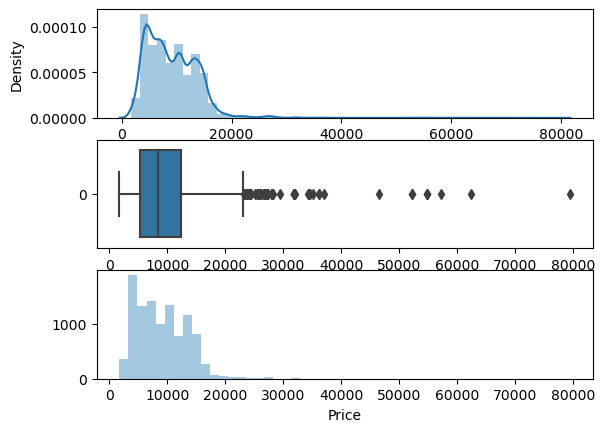

In [746]:
plot(data, 'Price')

In [747]:
q1 = data.Price.quantile(0.25) # 1st quartile
q3 = data.Price.quantile(0.75) # 3rd quartile
iqr = q3 - q1 # inter-quartile range

maximum = q3 + 1.5 * iqr
minimum = q1 - 1.5 * iqr

In [748]:
maximum

23017.0

In [749]:
minimum

-5367.0

In [750]:
data['Price'].median()

8372.0

In [751]:
# Fetching for outlier values

[price for price in data.Price if price > maximum or price < minimum]

94

In [752]:
# Replacing values greater than 3500 with median of price

data['Price'] = np.where(data.Price >= 35000, data.Price.median(), data.Price)

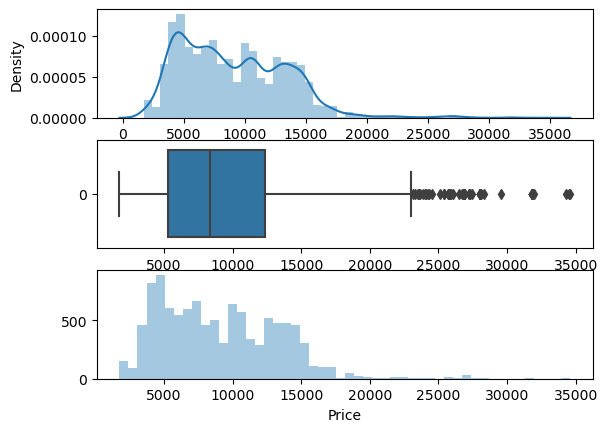

In [753]:
plot(data, 'Price')

## Feature selection

In [754]:
# Using mutual information method
from sklearn.feature_selection import mutual_info_regression

In [755]:
X = data.drop(columns=('Price'))
y = data.Price

In [756]:
imp = mutual_info_regression(X, y)
imp

array([0.96943248, 1.00625143, 0.78993247, 0.19581281, 0.24000949,
       0.34513362, 0.25978938, 0.39138106, 0.34684987, 0.46375518,
       0.33957653, 0.38740256, 0.45436428, 0.51651963, 0.13756051,
       0.19870083])

In [757]:
imp_df = pd.DataFrame(imp, index=X.columns)
imp_df

,0
Airline,0.969432
Destination,1.006251
Total_Stops,0.789932
Day_of_Journey,0.195813
Month_of_Journey,0.240009
Dep_Time_hour,0.345134
Dep_Time_minute,0.259789
Arrival_Time_hour,0.391381
Arrival_Time_minute,0.346850
duration_hour,0.463755


In [758]:
imp_df.columns = ['importance']

In [759]:
imp_df.sort_values(by='importance', ascending=False)

,importance
Destination,1.006251
Airline,0.969432
Total_Stops,0.789932
Source_Delhi,0.516520
duration_hour,0.463755
Source_Kolkata,0.454364
Arrival_Time_hour,0.391381
Source_Banglore,0.387403
Arrival_Time_minute,0.346850
Dep_Time_hour,0.345134


## Model building

In [760]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [761]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [762]:
rf = RandomForestRegressor()

In [763]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [764]:
y_pred = rf.predict(X_test)
y_pred

array([16775.6 ,  6497.11,  8906.89, ...,  3513.88,  6268.87,  7010.78])

In [765]:
r2_score(y_test, y_pred)

0.8095584380700591

In [766]:
import math 

In [767]:
math.sqrt(mean_squared_error(y_test, y_pred))

1925.4713935323243

## Saving/serializing a trained model

In [770]:
import pickle

In [771]:
import os

In [773]:
print(os.getcwd()) # Checking working directory

C:\Users\nazir\Desktop\ML Projects\Flight_Price_Prediction


In [776]:
# Writing model with pickle
with open('airline_ticket_rf_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [777]:
# Reading model
with open('airline_ticket_rf_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [778]:
y_pred = model.predict(X_test)
y_pred

array([16775.6 ,  6497.11,  8906.89, ...,  3513.88,  6268.87,  7010.78])

In [790]:
r2 = r2_score(y_test, y_pred)
r2

0.8095584380700591

### MAPE

In [780]:
def mape(y_test, y_pred):
    y_test, y_pred =  np.array(y_test), np.array(y_pred) # converting values in arrays
    return np.mean(np.abs((y_test - y_pred)/y_test))*100 # taking the absolute of the change in the test and predicted values. then finding mean of those values and then multiply by 100

In [782]:
mape(y_test, y_pred)

13.22351319858496

## Automating ML algorithms

In [783]:
from sklearn import metrics

In [809]:
def predict(ml_model):
    model_name = str(ml_model)[:-2]
    model = ml_model.fit(X_train, y_train)
    print('Training Score is {}'.format(model.score(X_train, y_train)))
    predictions = model.predict(X_test)
    print('\n')
    r2score = metrics.r2_score(y_test, predictions)
    
    print('r2score for ' + model_name + ' is {}'.format(r2score))
    
    print('MAE for ' + model_name + ' is {}'.format(metrics.mean_absolute_error(y_test, predictions)))
    
    print('MSE for ' + model_name + ' is {}'.format(metrics.mean_squared_error(y_test, predictions)))
    
    print('MAPE for ' + model_name + ' is {}'.format(mape(y_test, predictions)))
    sns.distplot(y_test-predictions)

Training Score is 0.951212691304766


r2score for RandomForestRegressor is 0.8069048619581826
MAE for RandomForestRegressor is 1181.11648129298
MSE for RandomForestRegressor is 3759098.844739073
MAPE for RandomForestRegressor is 13.220509447037514


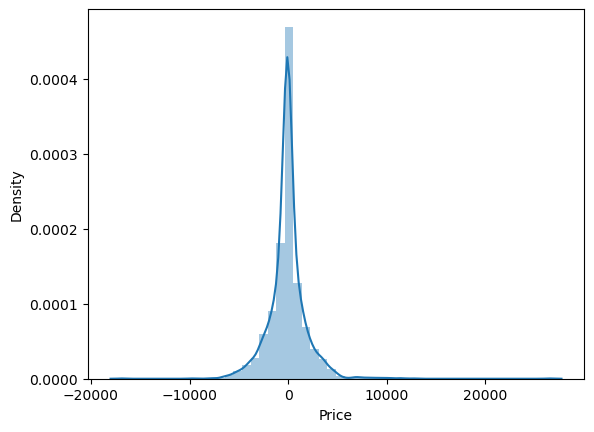

In [810]:
predict(RandomForestRegressor())

In [811]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor

Training Score is 0.5794483128817276


r2score for LinearRegression is 0.555713367195872
MAE for LinearRegression is 2061.784107595206
MSE for LinearRegression is 8649194.304132726
MAPE for LinearRegression is 24.94861105877552


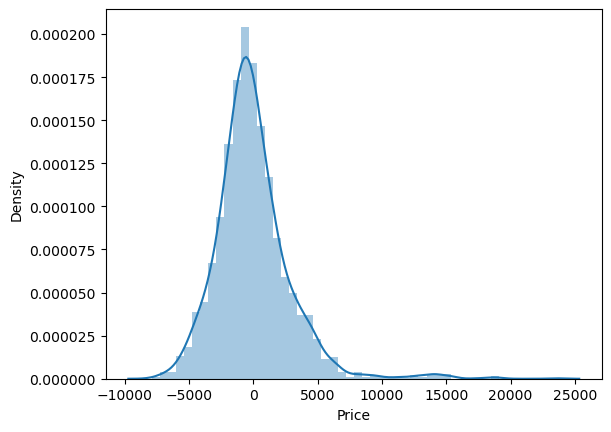

In [812]:
predict(LinearRegression())

Training Score is 0.6447468877891279


r2score for AdaBoostRegressor is 0.6225469875790515
MAE for AdaBoostRegressor is 2054.8024034485584
MSE for AdaBoostRegressor is 7348104.138321657
MAPE for AdaBoostRegressor is 28.21709362721058


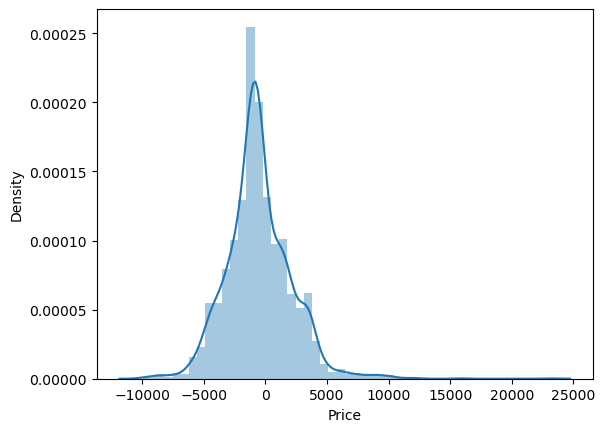

In [813]:
predict(AdaBoostRegressor())

In [805]:
predict(GradientBoostingRegressor())

Training Score is 0.7823236446549605


r2score for GradientBoostingRegressor is 0.763930811830182
MAE for GradientBoostingRegressor is 1508.7650257054813
MSE for GradientBoostingRegressor is 4595700.448633115
MAPE for GradientBoostingRegressor is 17.722274015478014


In [806]:
predict(BaggingRegressor())

Training Score is 0.9433326651250402


r2score for BaggingRegressor is 0.8010177836774818
MAE for BaggingRegressor is 1206.3790838588593
MSE for BaggingRegressor is 3873706.1279068035
MAPE for BaggingRegressor is 13.588007679114774


## Cross validation/Hyper-parameter tunning

In [814]:
from sklearn.model_selection import RandomizedSearchCV

In [815]:
reg_rf = RandomForestRegressor()

In [842]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num= 6)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(start= 5, stop=30, num=4)]

min_samples_split = [5, 10, 15, 100]

In [843]:
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth': max_depth,
              'min_samples_split':min_samples_split}

In [844]:
 rf_random = RandomizedSearchCV(estimator=reg_rf,
                                param_distributions= random_grid,
                                cv=3,
                                n_jobs= -1,
                                verbose=3) # Fitting model with different parameter values

In [845]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=3)

In [846]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 21}

In [847]:
rf_random.best_score_

0.8180690463679842

In [848]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=21, max_features='auto', min_samples_split=10,
                      n_estimators=1200)